In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('all_month.csv')
data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-01-18T02:18:19.690Z,38.807835,-122.823334,2.03,1.49,md,21.0,54.0,0.004681,0.02,...,2024-01-18T02:19:54.732Z,"7 km WNW of The Geysers, CA",earthquake,0.22,0.310,0.150,22.0,automatic,nc,nc
1,2024-01-18T02:16:52.710Z,38.808498,-122.823669,2.01,1.33,md,23.0,53.0,0.004320,0.02,...,2024-01-18T02:28:11.196Z,"7 km WNW of The Geysers, CA",earthquake,0.19,0.340,0.140,23.0,automatic,nc,nc
2,2024-01-18T01:55:45.006Z,64.994500,-147.409700,5.20,1.50,ml,NaN,NaN,NaN,0.60,...,2024-01-18T02:03:52.136Z,"10 km ENE of Fox, Alaska",earthquake,NaN,0.300,NaN,NaN,automatic,ak,ak
3,2024-01-18T01:48:21.130Z,36.020333,-117.781167,1.55,1.39,ml,27.0,62.0,0.013780,0.16,...,2024-01-18T01:54:25.834Z,"15 km NE of Little Lake, CA",earthquake,0.17,0.160,0.139,11.0,automatic,ci,ci
4,2024-01-18T01:46:32.440Z,38.826668,-122.853836,2.44,0.28,md,10.0,99.0,0.002529,0.01,...,2024-01-18T02:04:12.038Z,"10 km WNW of The Geysers, CA",earthquake,0.40,1.070,0.160,11.0,automatic,nc,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8881,2023-12-19T02:43:10.876Z,-7.242500,119.138700,593.76,4.90,mb,95.0,26.0,2.074000,0.75,...,2024-01-16T01:30:21.040Z,"142 km NNE of Bima, Indonesia",earthquake,3.86,6.268,0.054,107.0,reviewed,us,us
8882,2023-12-19T02:42:29.472Z,-22.785000,172.366200,10.00,5.30,mww,64.0,74.0,4.546000,0.74,...,2024-01-15T23:45:16.040Z,southeast of the Loyalty Islands,earthquake,10.15,1.808,0.075,17.0,reviewed,us,us
8883,2023-12-19T02:39:21.180Z,33.111333,-115.624833,9.51,1.34,ml,32.0,93.0,0.066410,0.19,...,2023-12-19T15:49:01.616Z,"8 km N of Westmorland, CA",earthquake,0.21,0.520,0.214,20.0,reviewed,ci,ci
8884,2023-12-19T02:35:17.230Z,38.826332,-122.804833,3.06,0.64,md,8.0,147.0,0.005036,0.01,...,2023-12-19T04:50:10.666Z,"7 km NW of The Geysers, CA",earthquake,1.08,1.470,0.120,7.0,automatic,nc,nc


In [10]:
print(data.head())

                       time   latitude   longitude  depth   mag magType   nst  \
0  2024-01-18T02:18:19.690Z  38.807835 -122.823334   2.03  1.49      md  21.0   
1  2024-01-18T02:16:52.710Z  38.808498 -122.823669   2.01  1.33      md  23.0   
2  2024-01-18T01:55:45.006Z  64.994500 -147.409700   5.20  1.50      ml   NaN   
3  2024-01-18T01:48:21.130Z  36.020333 -117.781167   1.55  1.39      ml  27.0   
4  2024-01-18T01:46:32.440Z  38.826668 -122.853836   2.44  0.28      md  10.0   

    gap      dmin   rms  ...                   updated  \
0  54.0  0.004681  0.02  ...  2024-01-18T02:19:54.732Z   
1  53.0  0.004320  0.02  ...  2024-01-18T02:28:11.196Z   
2   NaN       NaN  0.60  ...  2024-01-18T02:03:52.136Z   
3  62.0  0.013780  0.16  ...  2024-01-18T01:54:25.834Z   
4  99.0  0.002529  0.01  ...  2024-01-18T02:04:12.038Z   

                          place        type horizontalError depthError  \
0   7 km WNW of The Geysers, CA  earthquake            0.22       0.31   
1   7 km WNW of 

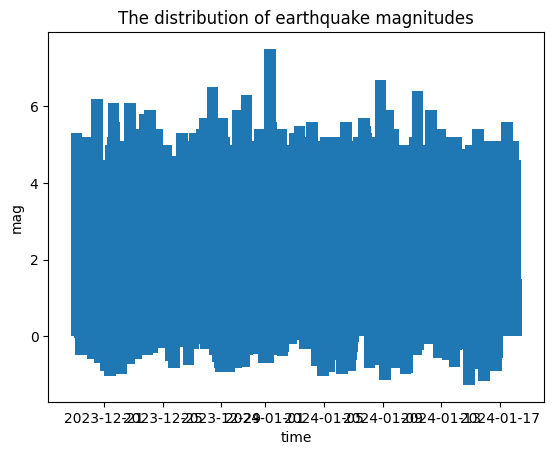

In [26]:
## Bar chart

plt.bar(data['time'], data['mag'])
plt.xlabel('time')
plt.ylabel('mag')
plt.title('The distribution of earthquake magnitudes')
plt.show()

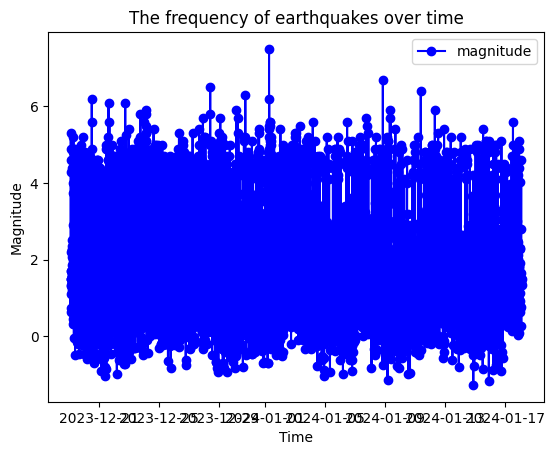

In [24]:
date_s = ['time']
mag_s = ['mag']
plt.plot(data['time'], data['mag'], color = 'b', marker = 'o', label = 'magnitude')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('The frequency of earthquakes over time')

plt.legend()
plt.show()

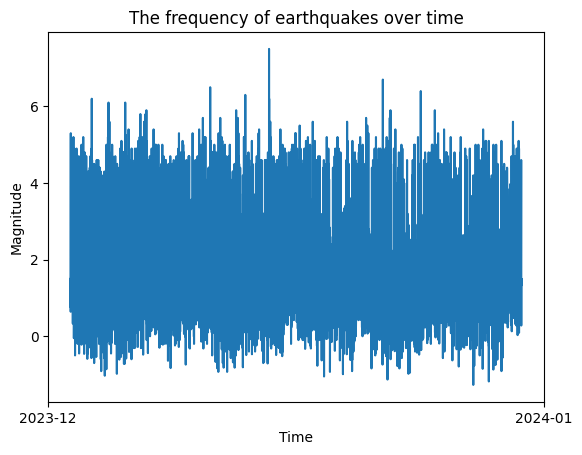

In [22]:
## Time series Line chart

data['time'] = pd.to_datetime(data['time'])
plt.plot(data['time'], data['mag'])
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('The frequency of earthquakes over time')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.show()

In [20]:
data['time'] = pd.to_datetime(data['time'])  # Convert the date column to datetime if not already
data_resampled = data.resample('6M', on='time').mean()  # Resample data for every 6 months

C:\Users\kater\AppData\Local\Temp\ipykernel_5960\2192062773.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_resampled = data.resample('6M', on='time').mean()  # Resample data for every 6 months


TypeError: agg function failed [how->mean,dtype->object]

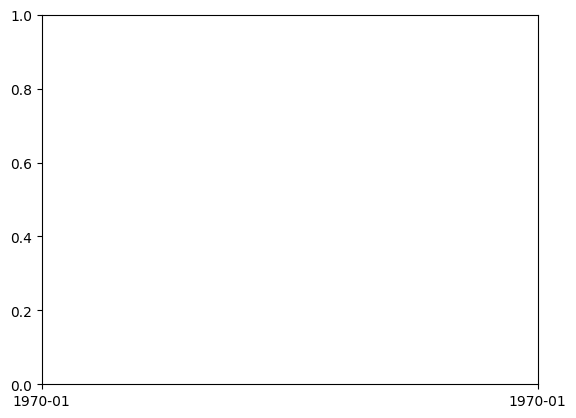

In [21]:
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

In [18]:
data['time'] = pd.to_datetime(data['time'])  # Convert the date column to datetime if not already
data_resampled = data.resample('6M', on='time').mean()  # Resample data for every 6 months

C:\Users\kater\AppData\Local\Temp\ipykernel_5960\2192062773.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_resampled = data.resample('6M', on='time').mean()  # Resample data for every 6 months


TypeError: agg function failed [how->mean,dtype->object]